<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team-1/blob/main/Notas_IBM_Module_4_A00759664.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

JOEL ORLANDO HERNÁNDEZ RAMOS

A00759664

**FIRST VIDEO SUMMARY: READING FILES WITH OPEN**


In python we can use the function "open" to get a file object. For example:<br>

file1= open("nameofthefile.txt, w") <br>
where the function is open, then we have the path and finally w is the mode (w=writing).

Attributes of the object file are .name, .mode. 

As for methods, we can use:

*   .close() to close the file reading
*   .readlines() to output every line as en element in a list. 
*   .read read the whole file. If inside the parenthesis we specify a number this number will print the corresponding amount of characters in the string. 

The with statemtent automatically closes the file when we stop coding inside the corresponding indexation to the statement. 





In [8]:
file1=open("/content/sample_data/README.md")
print(file1)

file1.name
file1.mode


<_io.TextIOWrapper name='/content/sample_data/README.md' mode='r' encoding='UTF-8'>


'r'

**IMPORTANT NOTES ON THE LAB FOR READING FILES WITH OPEN**

In [ ]:
##This cell should only be run once to download the example file from the lab.

import urllib.request
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%204/data/example1.txt'
filename = 'Example1.txt'
urllib.request.urlretrieve(url, filename)
!wget -O /resources/data/Example1.txt  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%204/data/example1.txt

In [49]:
example1 = "Example1.txt"
file1 = open(example1, "r") #abrir el archivo #reading is the default mode for opening a file

file1.name    #atributo del objeto file1 

FileCnt = file1.read()  #read is a function that literally prints what is inside the file. In this case it also reads the blank spaces given by /n
FileCnt

'This is line 1 \nThis is line 2\nThis is line 3'

In [51]:
with open(example1, "r") as file1: # with statement automatically closes the file.
    FileCnt = file1.read() #reads the whole file
    print(FileCnt)

with open(example1, "r") as file1:
    print(file1.read(4)) #does not read the whole files but only four characters specified in the parenthesis
    print(file1.readline(20)) # continue reading the next characters. However, because we are using readlines this will not read past the content of the line. 
    print(file1.read(20)) # Returns the next 20 chars. Read does prints beyond the line

This is line 1 
This is line 2
This is line 3
This
 is line 1 

This is line 2
This 


**SECOND VIDEO SUMMARY: WRITING FILES WITH OPEN**


In python we can use the function "write" to get a write data into that file object. For example:<br>

file1= open("nameofthefile.txt, w") <br>
where the function is open, then we have the path and finally w is the mode (w=writing). By specifing that we want the writing mode we imply to python that we want to create a file where we will be sending information to be stored. If there is a file in the path wiht the same name as the one you specified in your code this will re-written. 

file1.write('This is line A') will input the quoted text into the file we just created. 

file1= open("nameofthefile.txt, a") <br>

In this case, the only thing that we are changing is the mode to append. When we usi this mode it allows us to write over a existing file. 

Finally, it is imporatnt to mention that we can copy one file to a new file by using the readfile function.


**IMPORTANT NOTES ON THE LAB FOR WRITING FILES WITH OPEN**

In [67]:
ejemplo2 = 'Example2.txt'
with open(ejemplo2, 'w') as writefile:    #we create a file 
    writefile.write("This is line A") #we write inside the file
    
    #print(writefile.read()) # is we try to execute this line we would get an error because the file is not readble. We would need to call it in "r" mode when opening.

with open(ejemplo2, 'r') as readthewrittenfile: #here we open ejemplo2 as readable so therefore we can print its content. 
    print(readthewrittenfile.read())  




This is line A


In [75]:
#There are several ways we can add information to the file we can do it manually

with open(ejemplo2, 'w') as writefile:
    writefile.write("This is line A\n")
    writefile.write("This is line B\n")

# we can also use a list as an input. 

Lines = ["This is line A\n", "This is line B\n", "This is line C\n"]
with open('Example2.txt', 'w') as writefile:
    for line in Lines:
        print(line)
        writefile.write(line)

This is line A

This is line B

This is line C



In [76]:
#remember that every time we open a file an set it in w mode then we are overwritting it
with open('Example2.txt', 'w') as writefile:
    writefile.write("Overwrite\n")
with open('Example2.txt', 'r') as testwritefile:
    print(testwritefile.read())  #here you will notice that line a b c will be deleted and only the word Overwrite will appear.

Overwrite



In [77]:
with open('Example2.txt', 'a') as testwritefile:  # we cann add information to an existing file by using the append mode(a)
    testwritefile.write("This is line C\n")
    testwritefile.write("This is line D\n")
    testwritefile.write("This is line E\n")
with open('Example2.txt', 'r') as testwritefile:
    print(testwritefile.read())

Overwrite
This is line C
This is line D
This is line E



There are some extra modes that avoids us from opening and closing a file to change between read and write. (as we have been doing in our code)

*  r+ : Reading and writing. Cannot truncate the file.

*  w+ : Writing and reading. Truncates the file.

*  a+ : Appending and Reading. Creates a new file, if none exists.

When using the appending and reading mode you should know that the location in the file where the cursor is. Therefore, we should use . tell and . seek(offset, from). The first one returns the current position in bytes, while the second changes the position by 'offset' bytes with respect to 'from'.



In [78]:
with open('Example2.txt', 'a+') as testwritefile:
    print("Initial Location: {}".format(testwritefile.tell()))
    
    data = testwritefile.read()
    if (not data):  #this condition returns false when there are empty strings
            print('Read nothing') 
    else: 
            print(testwritefile.read())
            
    testwritefile.seek(0,0) # move 0 bytes from beginning.
    
    print("\nNew Location : {}".format(testwritefile.tell()))
    data = testwritefile.read()
    if (not data):   #this condition returns false when there are empty strings
            print('Read nothing') 
    else: 
            print(data)
    
    print("Location after read: {}".format(testwritefile.tell()) )

Initial Location: 55
Read nothing

New Location : 0
Overwrite
This is line C
This is line D
This is line E

Location after read: 55


The r+ and w+ have basically the same function. However, r+ does not tuncate the file. This means that if we are using r+ and we start writing the code from the beginning, when we finished we can have reamining strings from the previous version of the file. just as shown in the example below. 

In [79]:
with open('Example2.txt', 'r+') as testwritefile:
    data = testwritefile.readlines()
    testwritefile.seek(0,0) 
   
    testwritefile.write("Line 1" + "\n")
    testwritefile.write("Line 2" + "\n")
    testwritefile.write("Line 3" + "\n")
    testwritefile.write("finished\n")
    testwritefile.seek(0,0)
    print(testwritefile.read())

Line 1
Line 2
Line 3
finished
is line D
This is line E



The difference with the code above is that here we are using the .truncate function. Therefore we will overwrite the file from the beginning and delete the rest from the previous version.

In [80]:
with open('Example2.txt', 'r+') as testwritefile:
    data = testwritefile.readlines()
    testwritefile.seek(0,0) 
   
    testwritefile.write("Line 1" + "\n")
    testwritefile.write("Line 2" + "\n")
    testwritefile.write("Line 3" + "\n")
    testwritefile.write("finished\n")
    testwritefile.truncate()
    testwritefile.seek(0,0)
    print(testwritefile.read())

Line 1
Line 2
Line 3
finished



Finally we can copy the text of one file from another by using the following loop.

In [81]:
with open('Example2.txt','r') as readfile:
    with open('Example3.txt','w') as writefile:
          for line in readfile:
                writefile.write(line)

with open('Example3.txt','r') as testwritefile:
    print(testwritefile.read())


Line 1
Line 2
Line 3
finished



**LAB EXERCISE FOR THE WRITING FILES WITH OPEN FUNCTION**

Your local university's Raptors fan club maintains a register of its active members on a .txt document. Every month they update the file by removing the members who are not active. You have been tasked with automating this with your Python skills.<br>
Given the file currentMem, Remove each member with a 'no' in their Active column. Keep track of each of the removed members and append them to the exMem file. Make sure that the format of the original files is preserved. (Hint: Do this by reading/writing whole lines and ensuring the header remains )<br>
Run the code block below prior to starting the exercise. The skeleton code has been provided for you. Edit only the cleanFiles function.<br>

In [85]:
#Run this prior to starting the exercise. This was copy pasted from the lab as it was indicated that way by the exercise. Is a pre-requisite.
from random import randint as rnd

memReg = 'members.txt'
exReg = 'inactive.txt'
fee =('yes','no')

def genFiles(current,old):
    with open(current,'w+') as writefile: 
        writefile.write('Membership No  Date Joined  Active  \n')
        data = "{:^13}  {:<11}  {:<6}\n"

        for rowno in range(20):
            date = str(rnd(2015,2020))+ '-' + str(rnd(1,12))+'-'+str(rnd(1,25))
            writefile.write(data.format(rnd(10000,99999),date,fee[rnd(0,1)]))


    with open(old,'w+') as writefile: 
        writefile.write('Membership No  Date Joined  Active  \n')
        data = "{:^13}  {:<11}  {:<6}\n"
        for rowno in range(3):
            date = str(rnd(2015,2020))+ '-' + str(rnd(1,12))+'-'+str(rnd(1,25))
            writefile.write(data.format(rnd(10000,99999),date,fee[1]))


genFiles(memReg,exReg)


In [96]:
def cleanFiles(currentMem, exMem):
  with open(currentMem, 'r+') as writefile:
    with open(exMem, 'a+') as appendfile:
      writefile.seek(0)
      members=writefile.readlines()
      header= members.pop(0) #this will remove the header from the list and also will save the headers in the variable for later use.

      inactive=[] #we create a variable were we will store the inactive members
      for active_members in members:
        if 'no' in active_members:
          inactive.append(active_members)
     
      writefile.seek(0) 
      writefile.write(header)  #we re state the header. 
      for member in members:
        if (member in inactive):
            appendfile.write(member)  #we add all the new exmembers into the file
        else:
            writefile.write(member)   #we leave the rest in the active members file 
      writefile.truncate()  # we truncate because we are using r+ function


# The code below is to help you view the files.
# Do not modify this code for this exercise.
memReg = 'members.txt'
exReg = 'inactive.txt'
cleanFiles(memReg,exReg)


headers = "Membership No  Date Joined  Active  \n"
with open(memReg,'r') as readFile:
    print("Active Members: \n\n")
    print(readFile.read())
    
with open(exReg,'r') as readFile:
    print("Inactive Members: \n\n")
    print(readFile.read())
                

Active Members: 


Membership No  Date Joined  Active  
    33438      2017-10-15   yes   
    45279      2018-8-19    yes   
    95798      2019-8-9     yes   
    75424      2016-2-22    yes   
    11276      2019-6-24    yes   
    12471      2017-2-16    yes   
    93398      2015-4-19    yes   

Inactive Members: 


Membership No  Date Joined  Active  
    50893      2017-3-18    no    
    79385      2019-5-21    no    
    20151      2019-1-24    no    
    54759      2015-3-5     no    
    59298      2020-3-5     no    
    79933      2018-4-24    no    
    90010      2015-5-15    no    
    14738      2020-6-4     no    
    96768      2017-9-17    no    
    21710      2019-10-8    no    
    69408      2020-4-24    no    
    82132      2020-9-22    no    
    88344      2017-8-25    no    
    42931      2017-10-21   no    
    76496      2015-12-24   no    
    37688      2017-4-4     no    



**THIRD VIDEO SUMMARY: LOADING DATA WITH PANDAS**

Dependancies or libraries are pre-written code to help solve problems. Panda is one of the most commons.

We acces to panda by using the following code: import pandas. <br>

With this lineof code we have access to all its classes and functions assuming that the library is already installed in our python environment.

By using the "as" statement we can shorten pandas to pd. This way we dont have to write pandas everytime we want to use a function from the library. 

The .read_csv is a function that allows you to read a .csv file. 

We can create dataframes by importing files like. csv or excel files. However we can also create dataframse our of dictionaires where the kers correspond to the column labels and the values are lists corresponding to the rows. Other way o seeing it is that the keys are the headers and the values are the rows.  

We can extract a portion of a dataframe by casting the name of the header. 

newdataframe=['columnheadername']

You can access individual items in a data frame by using the .ix method. In the coordinates of this function the first index refers to the row and the second to the column. You can use this coordinates to slice your dateframes. 


**SOLVING THE QUESTIONS BELOW THE VIDEO**

QUESTION 1

Consider the dataframe df. How would you find the element in the second row and first column?

In [109]:
import pandas as pd

df= pd.DataFrame({'a':[11,21,31],'b':[21,22,23]})

df.head()

df.iloc[1,0]

21

QUESTION 2

Will the following code run?


In [110]:
import pandas as banana

df=banana.DataFrame({'a':[11,21,31],'b':[21,22,23]})

df.head()

,a,b
0,11,21
1,21,22
2,31,23


**LAB FOR LOADING DATA WITH PANDAS**



In [112]:
import pandas as pd

df=pd.DataFrame({'a':[11,21,31],'b':[21,22,23]})

#Display the first 3 rows:

df.head(3)





,a,b
0,11,21
1,21,22
2,31,23


In [113]:
#Obtain column  'a' : 

df['a']

0    11
1    21
2    31
Name: a, dtype: int64

**FOURTH VIDEO SUMMARY: Working with and Saving data with Pandas**

Withs oandas we can work with data and save the results in other formats.

For example, unique is a method that returns the unique elements in a dataframe. 

We can also creates new databases consisting of specific characteristics like for example a list of songs released after 1979. To do that we would use inequality operators.

for example: df1=df[df['Released']>=1980]

This would create a new dataframe for each album released after 1979. We can sabe this file into csv file with the method  df1.to_csv('nameofthefile.csv')

**SOLVING THE QUESTIONS BELOW THE VIDEO**


 QUESTION 1<BR>
Consider the dataframe: df=pd.DataFrame({'a':[1,2,1],'b':[1,1,1]})

What type does the following return: df['a']==1 ?

In [3]:
import pandas as pd

df=pd.DataFrame({'a':[1,2,1],'b':[1,1,1]})

df['a']==1

0     True
1    False
2     True
Name: a, dtype: bool

QUESTION 2 <BR>

What task does the following method perform: df.to_csv("file.csv")?

save a dataframe to a csv file. 

**LAB NOTEBOOK FOR WORKING AND SAVING DATA WITH PANDAS**

In [4]:
import pandas as pd

df=pd.DataFrame({'a':[1,2,1],'b':[1,1,1]})

df['a'].unique()  #FINDING THE UNIQUE VALUES IN COLUMN A

array([1, 2])

In [5]:
df[df['a']<2]  #looking for a datagrame with rows where A is less than two.


,a,b
0,1,1
2,1,1


**LAB NOTEBOOK INTRODUCTION TO PANDAS IN PYTHON**

In [23]:

import pandas as pd

#Read using CSV Files
csv_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%204/data/TopSellingAlbums.csv'
df = pd.read_csv(csv_path)

df.head()


,Artist,Album,Released,Length,Genre,Music Recording Sales (millions),Claimed Sales (millions),Released.1,Soundtrack,Rating
0,Michael Jackson,Thriller,1982,0:42:19,"pop, rock, R&B",46.0,65,30-Nov-82,NaN,10.0
1,AC/DC,Back in Black,1980,0:42:11,hard rock,26.1,50,25-Jul-80,NaN,9.5
2,Pink Floyd,The Dark Side of the Moon,1973,0:42:49,progressive rock,24.2,45,01-Mar-73,NaN,9.0
3,Whitney Houston,The Bodyguard,1992,0:57:44,"R&B, soul, pop",27.4,44,17-Nov-92,Y,8.5
4,Meat Loaf,Bat Out of Hell,1977,0:46:33,"hard rock, progressive rock",20.6,43,21-Oct-77,NaN,8.0


In [25]:
x = df[['Length']]  #ACCESSING A SPECIFIC COLUMN
x

y = df[['Artist','Length','Genre']]  #ACCESSING MULTIPLE COLUMNS
y

,Artist,Length,Genre
0,Michael Jackson,0:42:19,"pop, rock, R&B"
1,AC/DC,0:42:11,hard rock
2,Pink Floyd,0:42:49,progressive rock
3,Whitney Houston,0:57:44,"R&B, soul, pop"
4,Meat Loaf,0:46:33,"hard rock, progressive rock"
5,Eagles,0:43:08,"rock, soft rock, folk rock"
6,Bee Gees,1:15:54,disco
7,Fleetwood Mac,0:40:01,soft rock


In [33]:
import pandas as pd

#Read using CSV Files
csv_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%204/data/TopSellingAlbums.csv'
df = pd.read_csv(csv_path)



# Access the value on the first row and the first column

df.iloc[0, 0]  #REMEMBER THAT ROWS ARE FIRST THEN COLUMNS IN THE COORDINATES

# Access the column using the name

df.loc[1, 'Artist'] #it is the same to calling the column by its name than by its index.


df.iloc[0:2, 0:3]  #slicing the dataframe

df.loc[0:2, 'Artist':'Released']



,Artist,Album,Released
0,Michael Jackson,Thriller,1982
1,AC/DC,Back in Black,1980
2,Pink Floyd,The Dark Side of the Moon,1973


**QUIZ FROM THE LAB NOTEBOOK INTRODUCTION TO PANDAS IN PYTHON**

Question 1:

Use a variable q to store the column Rating as a dataframe

In [35]:
q= df[['Rating']]
q

,Rating
0,10.0
1,9.5
2,9.0
3,8.5
4,8.0
5,7.5
6,7.0
7,6.5


Question 2: 

Assign the variable q to the dataframe that is made up of the column Released and Artist:

In [ ]:
q = df[['Released', 'Artist']]
q


QUESTION 3:

Access the 2nd row and the 3rd column of df:

In [ ]:
df.iloc[1, 2]

QUESTION 4:

Use the following list to convert the dataframe index df to characters and assign it to df_new; find the element corresponding to the row index a and column 'Artist'. Then select the rows a through d for the column 'Artist'


In [36]:
new_index=['a','b','c','d','e','f','g','h']

df_new=df   #WE CREATE DF_NEW AND assign the values from DF
df_new.index=new_index   #WE CHANGE THE INDEX FROM NUMBERS TO LETTERS

print(df_new.loc['a', 'Artist']) #WE LOOK FOR THE ELEMENT THAT CORRESPONDES TO THE SPECIFEID ROW
df_new.loc['a':'d', 'Artist'] #we prin the selected rows for the column artist
    

Michael Jackson


a    Michael Jackson
b              AC/DC
c         Pink Floyd
d    Whitney Houston
Name: Artist, dtype: object

**FINAL REVIEW QUESTIONS FOR MODULE 4**

Question 1

What do the following lines of code do?

with open("Example1.txt","r") as file1:

FileContent=file1.readlines()

print(FileContent)

In [ ]:
with open("Example1.txt","r") as file1:

  FileContent=file1.readlines()

  print(FileContent)

 #this code is for opening Example 1 and reading it

Question 2

What do the following lines of code do?

with open("Example2.txt","w") as writefile:

writefile.write("This is line A\n")

writefile.write("This is line B\n")

In [ ]:
with open("Example2.txt","w") as writefile:

  writefile.write("This is line A\n")

  writefile.write("This is line B\n")

  #this creates a file example 2 and start writing over it.

QUESTION 3

What do the following lines of code do?

with open("Example3.txt","a") as file1:

file1.write("This is line C\n")

In [ ]:
with open("Example3.txt","a") as file1:

  file1.write("This is line C\n")
  #THIS APPENDS the text in file EXAMPLE 3

QUESTION 4

What is the result of applying the following method df.head() to the dataframe "df"?

Prinst the first 5 rows of the dataframe

# UP TO THIS POINT MODULE 4 HAS BEEN FINALIZED

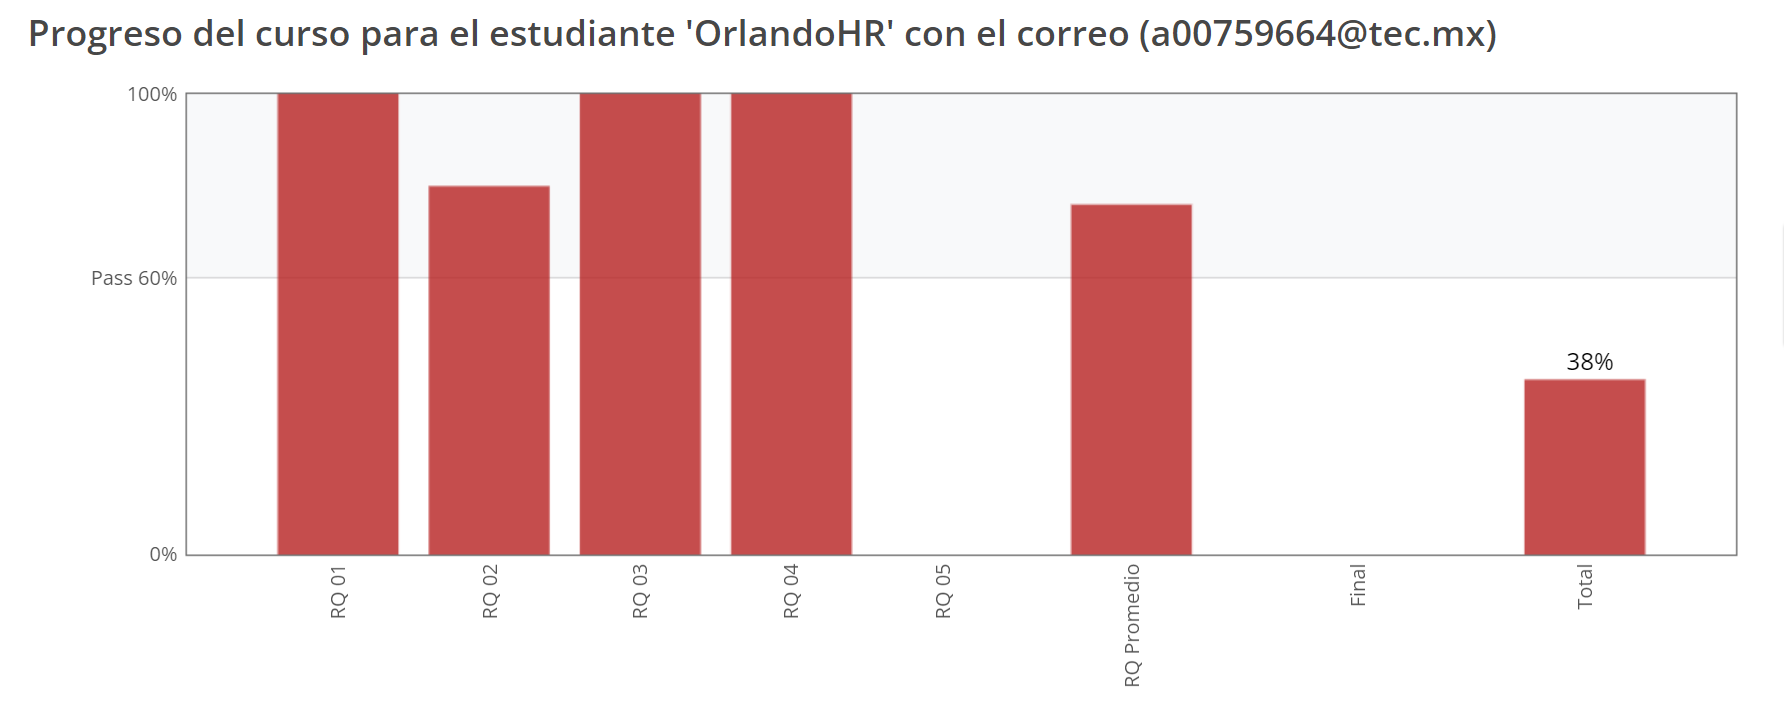